In [72]:
# Module Import
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [73]:
# Tech stock list
tech_list = ['AAPL', 'Goog', 'MSFT', 'AMZN' , 'NVDA', 'META', 'TSLA']
non_tech_list = ['SPY', 'COST', 'SR', 'LLY', 'JPM', 'UNH', 'V', 'HD']

In [74]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [75]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [76]:
tech_company_list = [AAPL, Goog, MSFT, AMZN , NVDA, META, TSLA]
tech_company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "NVIDIA", "META", "TESLA"]

In [77]:
for company, tcom_name in zip(tech_company_list, tech_company_name):
    company["tech_company_name"] = tcom_name

In [78]:
df = pd.concat(tech_company_list, axis=0)
df.tail(10)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-08-20  224.880005  228.220001  219.559998  221.100006  221.100006   
2024-08-21  222.669998  224.660004  218.860001  223.270004  223.270004   
2024-08-22  223.820007  224.800003  210.320007  210.660004  210.660004   
2024-08-23  214.460007  221.479996  214.210007  220.320007  220.320007   
2024-08-26  218.750000  219.089996  211.009995  213.210007  213.210007   
2024-08-27  213.250000  215.660004  206.940002  209.210007  209.210007   
2024-08-28  209.720001  211.839996  202.589996  205.750000  205.750000   
2024-08-29  209.800003  214.889999  205.970001  206.279999  206.279999   
2024-08-30  208.630005  214.570007  207.029999  214.110001  214.110001   
2024-09-03  215.253006  219.899994  209.640106  210.600006  210.600006   

              Volume tech_company_name  
Date                                    
2024-08-20  74001200             TESLA  
2024-08-21  70146000             TESLA  
2024-08-22  79514500             TESLA  
2024-08-23  81525200             TESLA  
2024-08-26  59301200             TESLA  
2024-08-27  62821400             TESLA  
2024-08-28  64116400             TESLA  
2024-08-29  62308800             TESLA  
2024-08-30  63246000             TESLA  
2024-09-03  76297792             TESLA

In [40]:
#data = yf.download("SPY AAPL", period="1mo")
#df = pd.DataFrame(data)

[*********************100%***********************]  2 of 2 completed


In [41]:
# Summary Stats
AAPL.describe()

Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   190.553466  192.324223  188.921075  190.689881  190.172908   
std     18.582519   18.827076   18.176692   18.525112   18.693698   
min    165.350006  166.399994  164.080002  165.000000  164.585999   
25%    175.440002  177.395004  173.840004  175.615005  174.752975   
50%    187.039993  188.300003  185.190002  186.860001  186.153625   
75%    196.095001  197.190002  194.610001  196.389999  195.919525   
max    236.479996  237.229996  233.089996  234.820007  234.548523   

             Volume  
count  2.510000e+02  
mean   5.991482e+07  
std    2.511112e+07  
min    2.404830e+07  
25%    4.620660e+07  
50%    5.343900e+07  
75%    6.598470e+07  
max    2.464214e+08

In [30]:
AAPL.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-09-05 to 2024-09-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


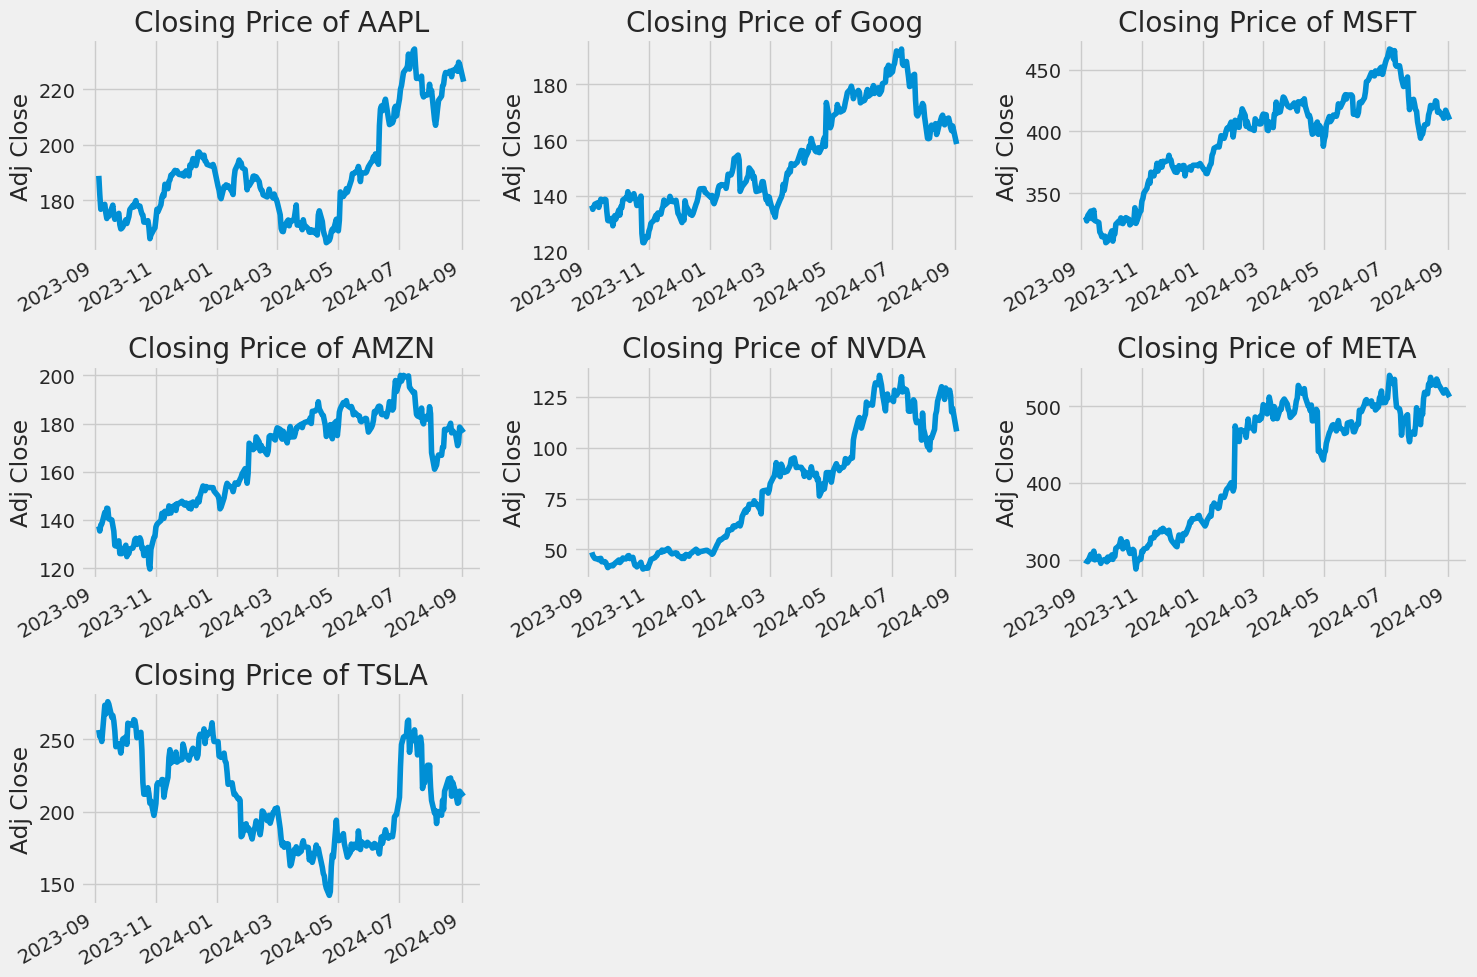

In [42]:
# Historical View of Closing Prices
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(tech_company_list, 1):
    plt.subplot(3, 3, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()


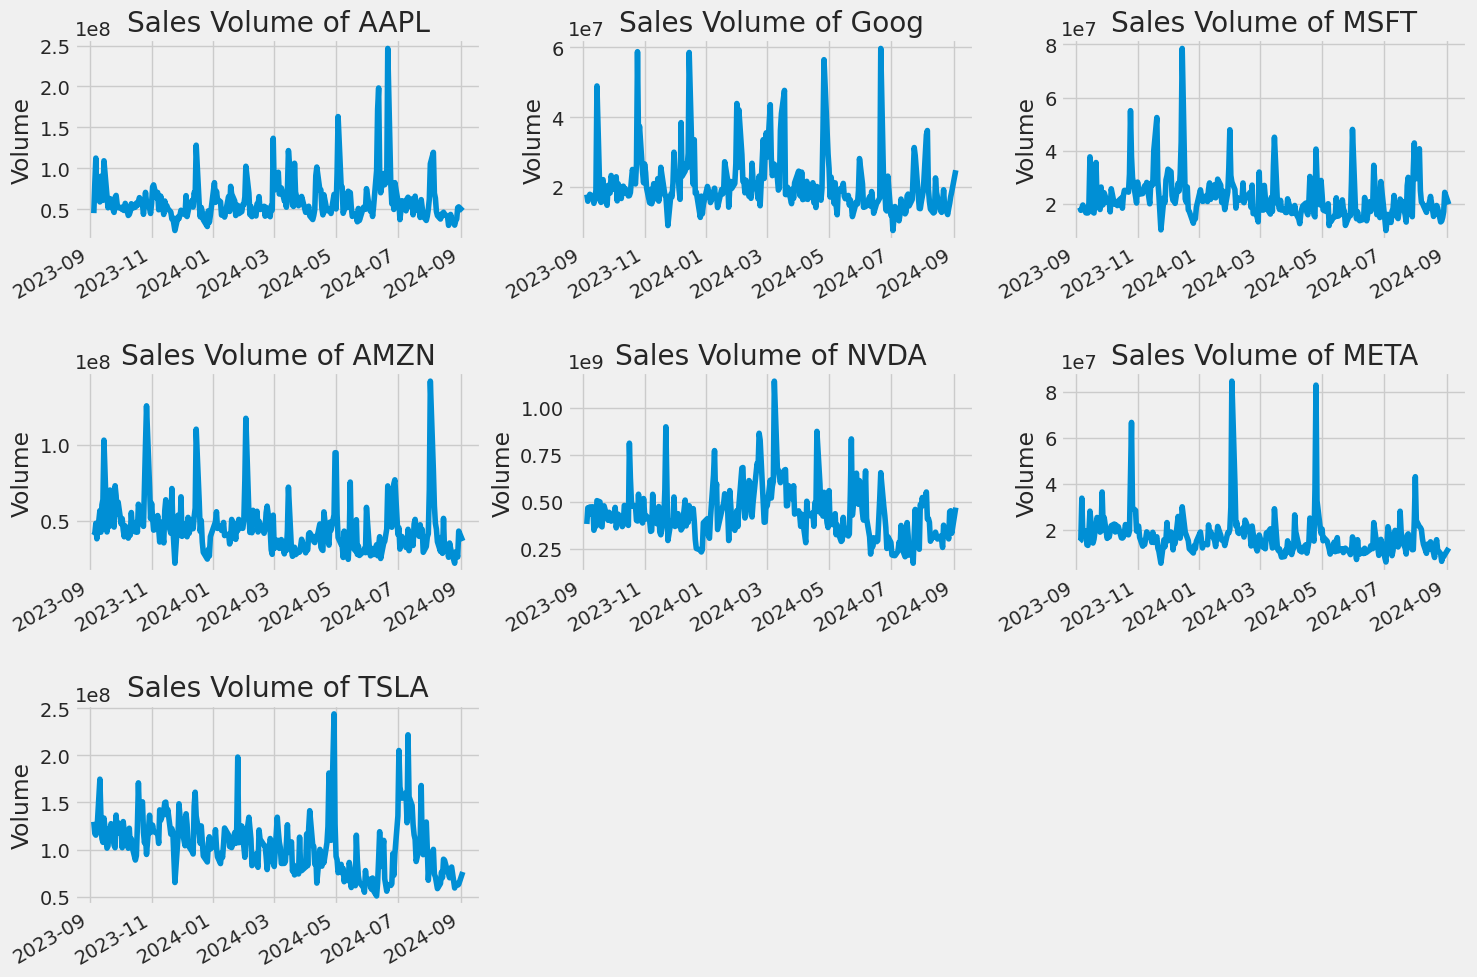

In [43]:
# Check the Volume of transactions each day
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(tech_company_list, 1):
    plt.subplot(3, 3, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume of {tech_list[i - 1]}")

plt.tight_layout()

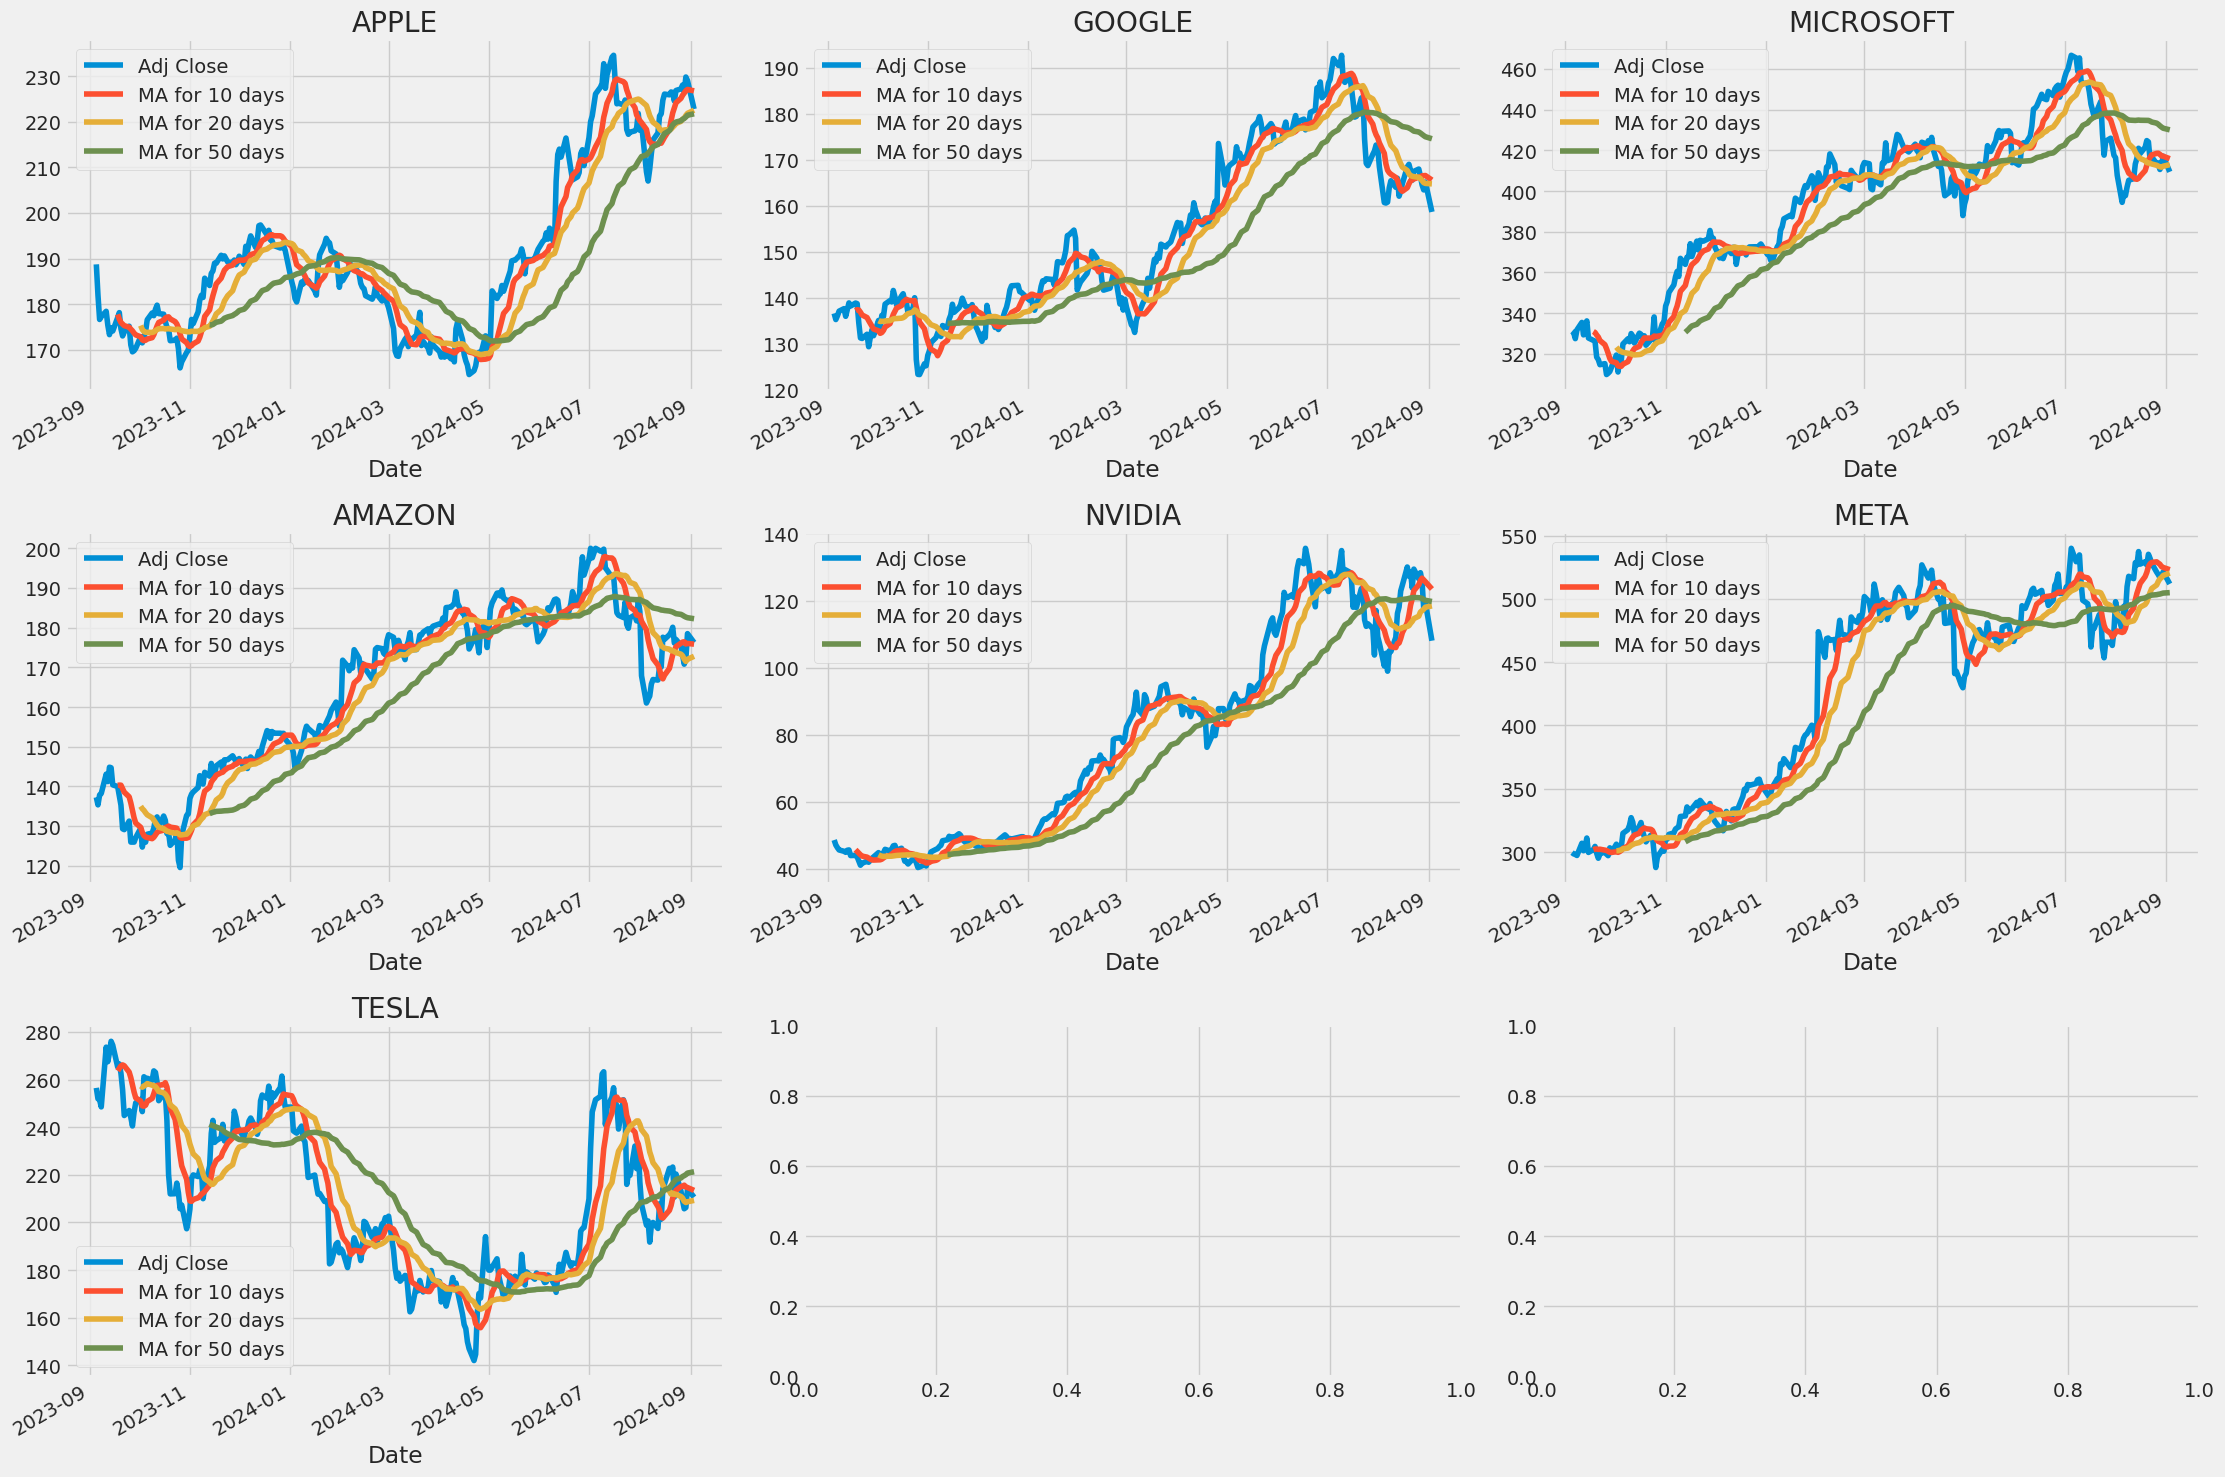

In [56]:
#Plot the Moving Average MA

ma_day = [10, 20, 50]

for ma in ma_day:
    for company in tech_company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows = 3, ncols = 3)
fig.set_figheight(15)
fig.set_figwidth(22.5)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

Goog[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,2])
axes[0,2].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('AMAZON')

NVDA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('NVIDIA')

META[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,2])
axes[1,2].set_title('META')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('TESLA')

 
fig.tight_layout()

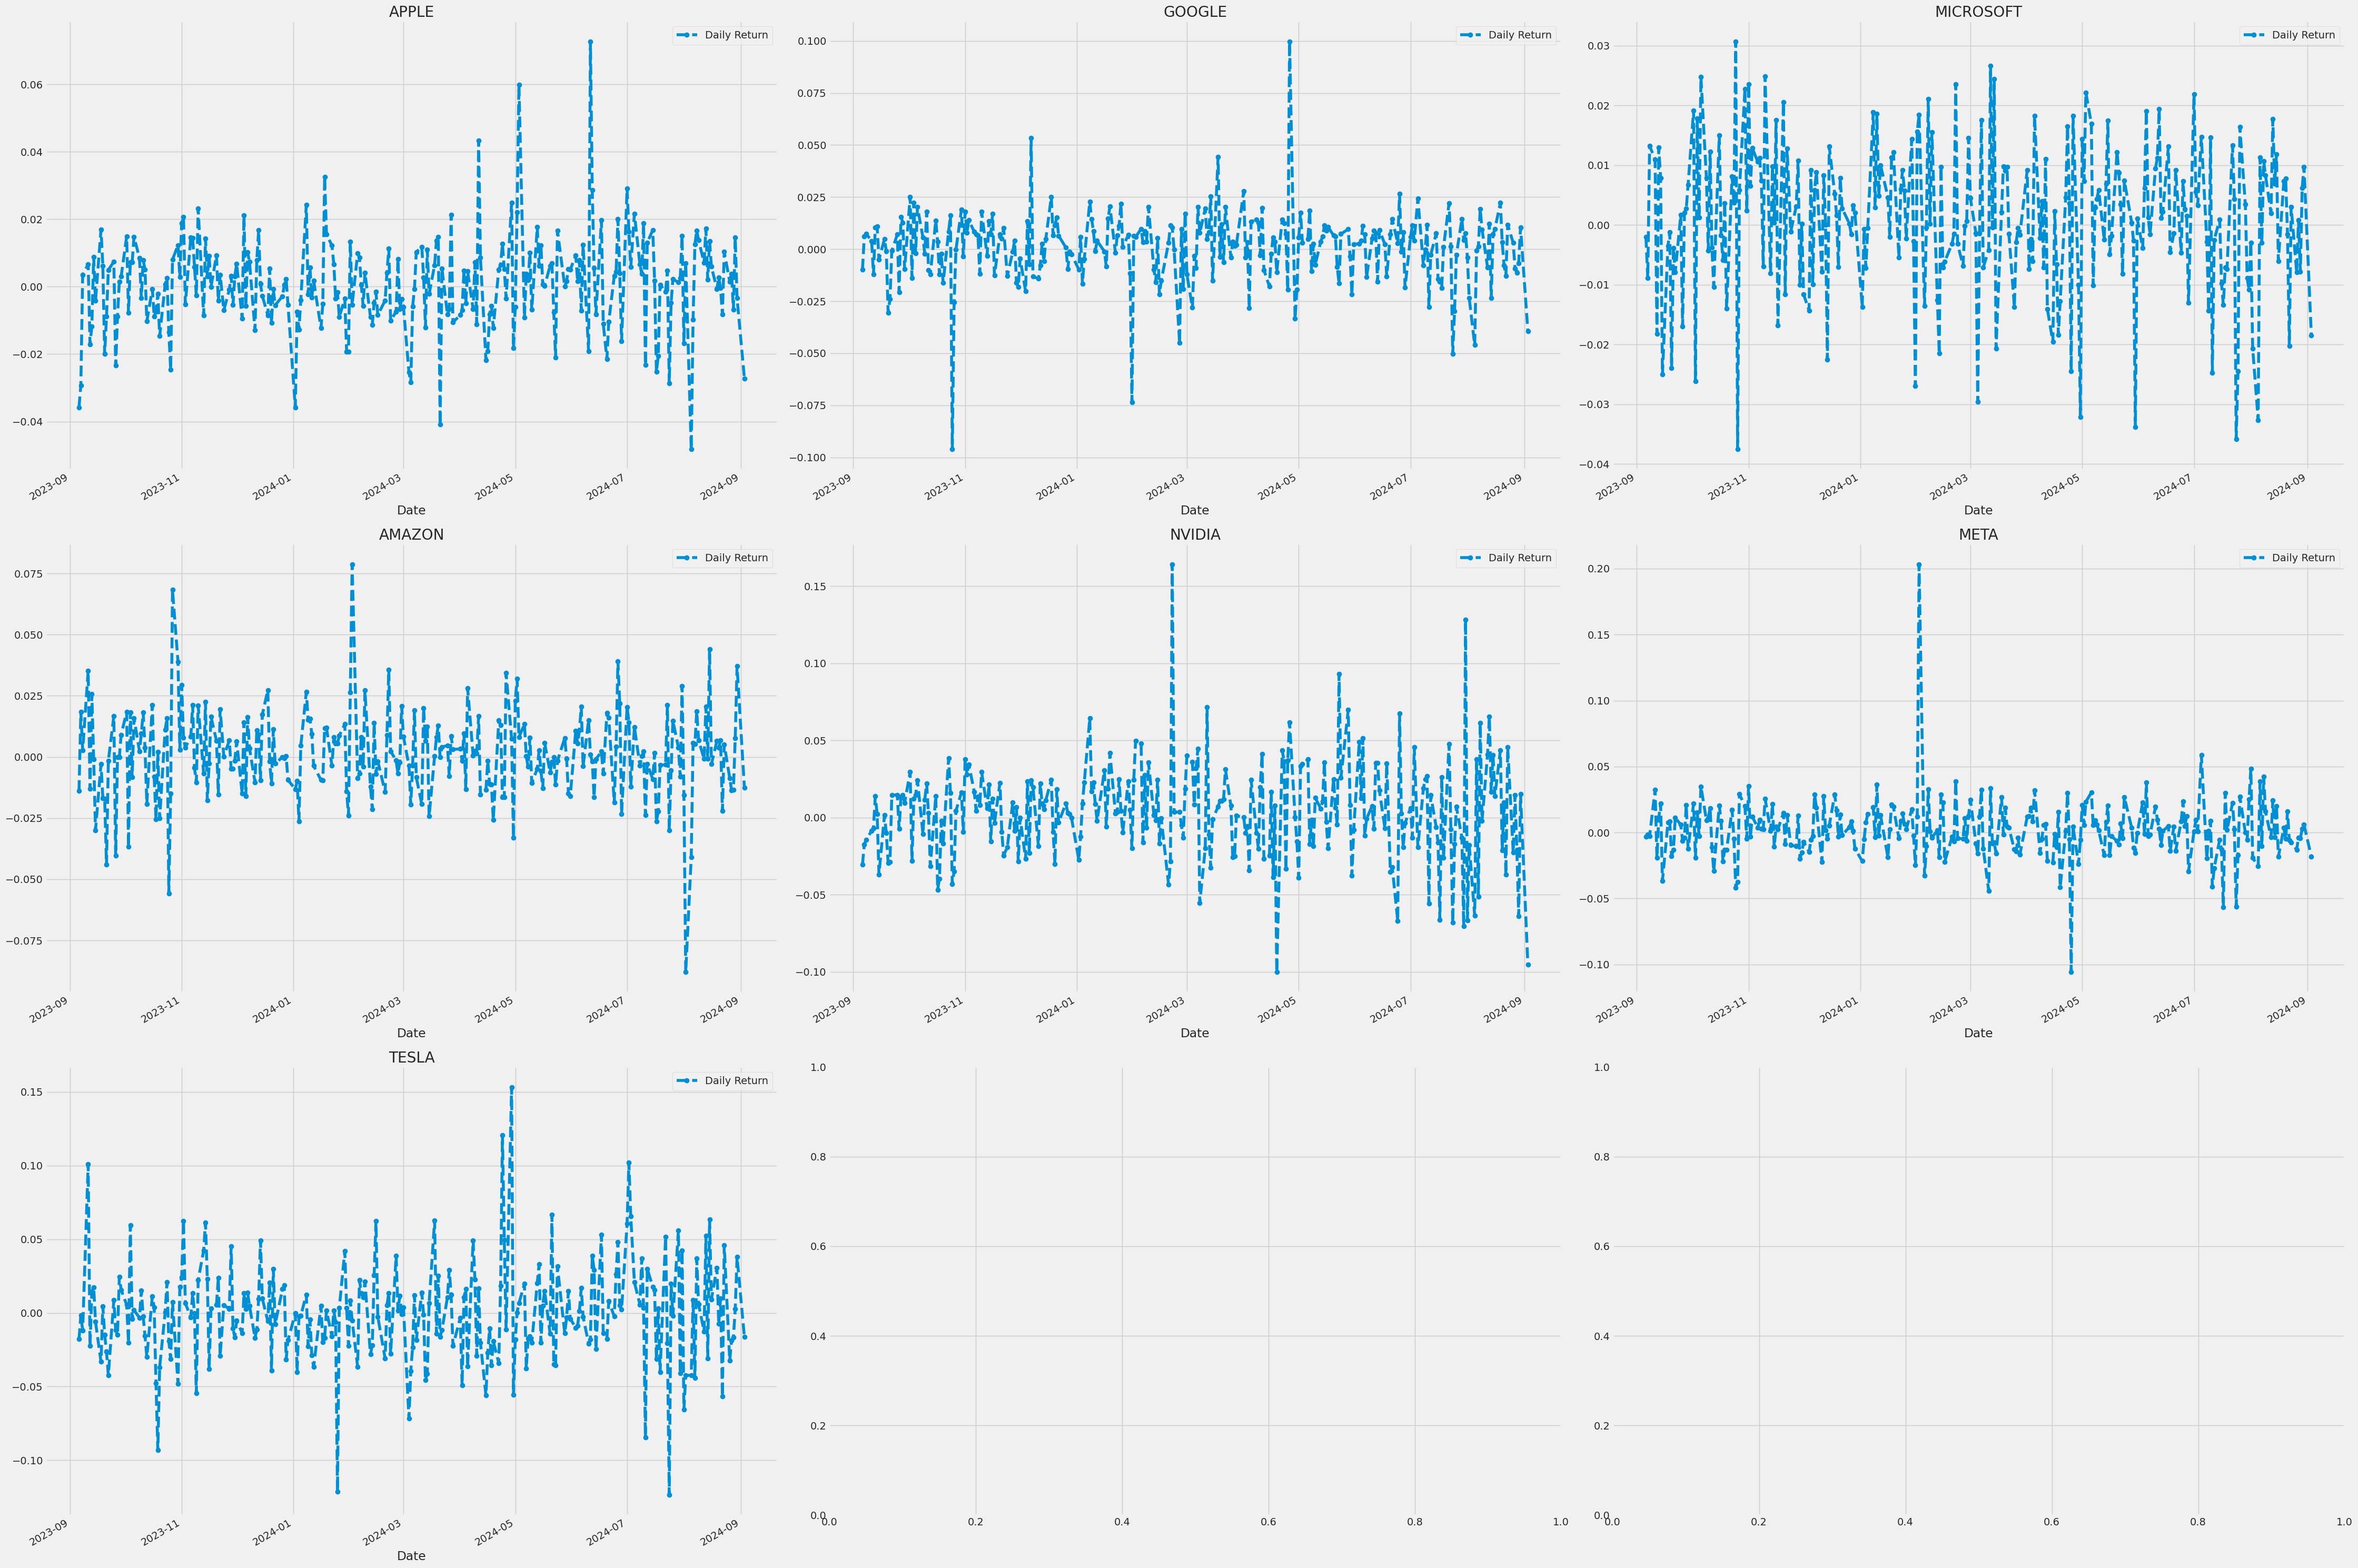

In [61]:
# Percentage change of each day

for company in tech_company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

#Plot Daily returns
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_figheight(30)
fig.set_figwidth(45)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

Goog['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[0,2], legend=True, linestyle='--', marker='o')
axes[0,2].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('AMAZON')

NVDA['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('NVIDIA')

META['Daily Return'].plot(ax=axes[1,2], legend=True, linestyle='--', marker='o')
axes[1,2].set_title('META')

TSLA['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('TESLA')

 
fig.tight_layout()

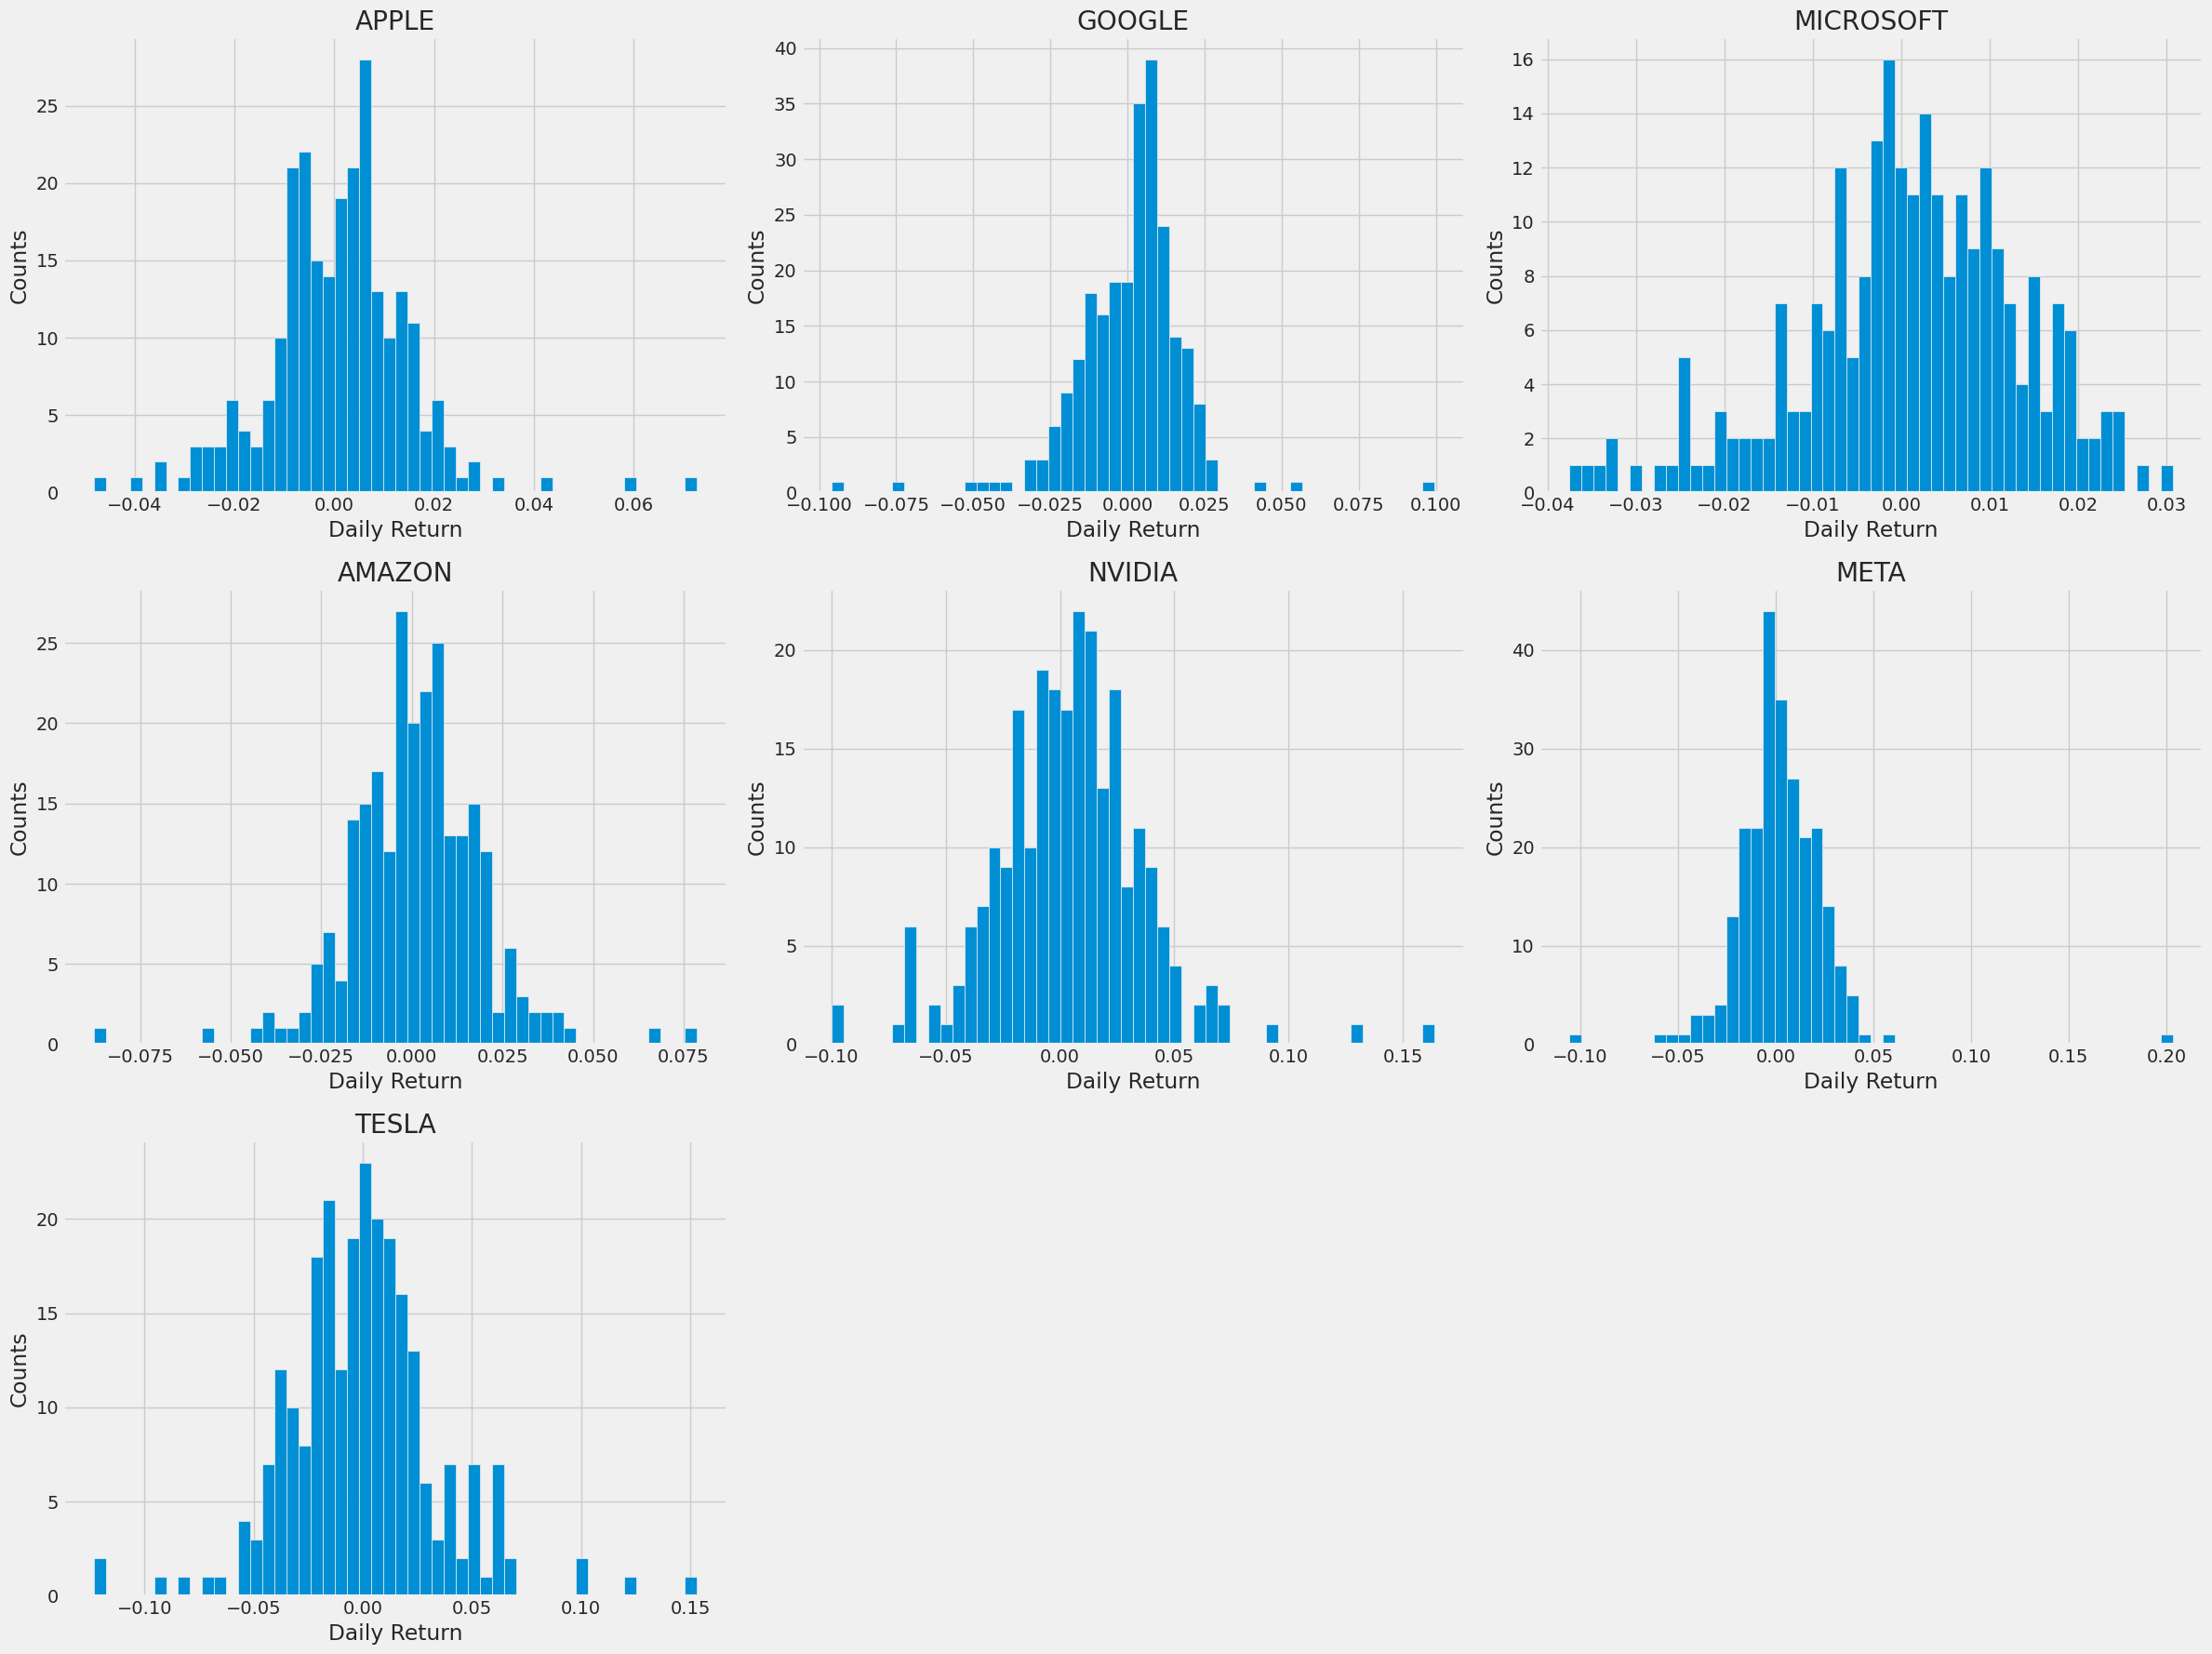

In [67]:
plt.figure(figsize=(24, 18))

for i, company in enumerate(tech_company_list, 1):
    plt.subplot(3, 3, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{tech_company_name[i - 1]}')

plt.tight_layout()

In [116]:
#Create DF with all companies in one column
closing_df = pd.concat(tech_company_list, axis=0)
#Remove unused columns
closing_df = closing_df[['Adj Close','tech_company_name']]
 
#Pivot giving each companies Adj Close in seperate columns.
closing_df_pivot = closing_df.pivot( columns='tech_company_name' , values='Adj Close')
closing_df_pivot.head()


tech_company_name      AMAZON       APPLE      GOOGLE        META   MICROSOFT  \
Date                                                                            
2023-09-05         137.270004  188.734238  136.554611  299.534485  331.065002   
2023-09-06         135.360001  181.978806  135.216125  298.556519  330.399994   
2023-09-07         137.850006  176.656006  136.045181  298.057526  327.452148   
2023-09-08         138.229996  177.272858  137.044052  297.279114  331.779633   
2023-09-11         143.100006  178.446884  137.583435  306.929260  335.422333   

tech_company_name     NVIDIA       TESLA  
Date                                      
2023-09-05         48.533470  256.489990  
2023-09-06         47.050793  251.919998  
2023-09-07         46.230965  251.490005  
2023-09-08         45.562115  248.500000  
2023-09-11         45.168198  273.579987

In [117]:
# Make a new tech returns DataFrame
tech_rets = closing_df_pivot.pct_change()
tech_rets.head()

tech_company_name    AMAZON     APPLE    GOOGLE      META  MICROSOFT  \
Date                                                                   
2023-09-05              NaN       NaN       NaN       NaN        NaN   
2023-09-06        -0.013914 -0.035793 -0.009802 -0.003265  -0.002009   
2023-09-07         0.018395 -0.029250  0.006131 -0.001671  -0.008922   
2023-09-08         0.002757  0.003492  0.007342 -0.002612   0.013216   
2023-09-11         0.035231  0.006623  0.003936  0.032462   0.010979   

tech_company_name    NVIDIA     TESLA  
Date                                   
2023-09-05              NaN       NaN  
2023-09-06        -0.030550 -0.017817  
2023-09-07        -0.017424 -0.001707  
2023-09-08        -0.014468 -0.011889  
2023-09-11        -0.008646  0.100925

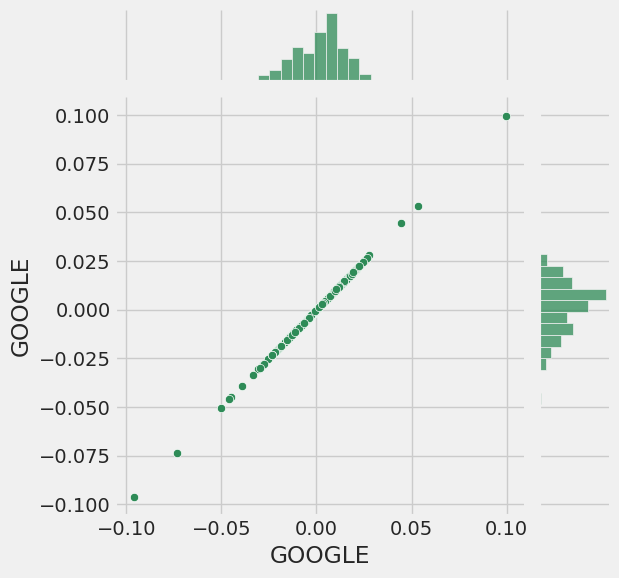

In [120]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOGLE', y='GOOGLE', data=tech_rets, kind='scatter', color='seagreen')

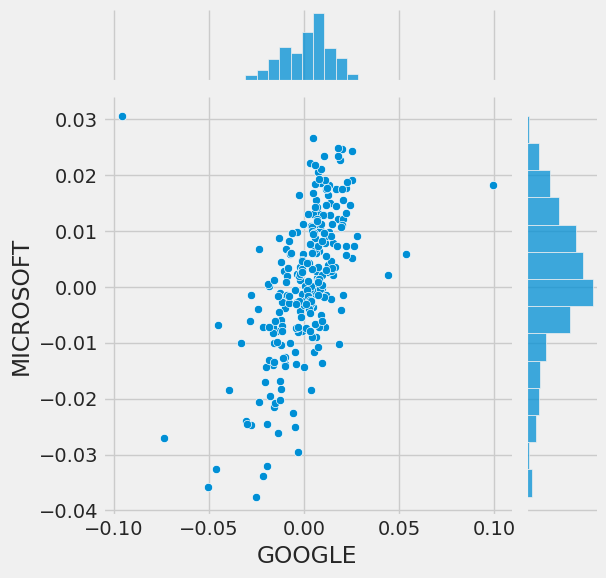

In [121]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOGLE', y='MICROSOFT', data=tech_rets, kind='scatter')

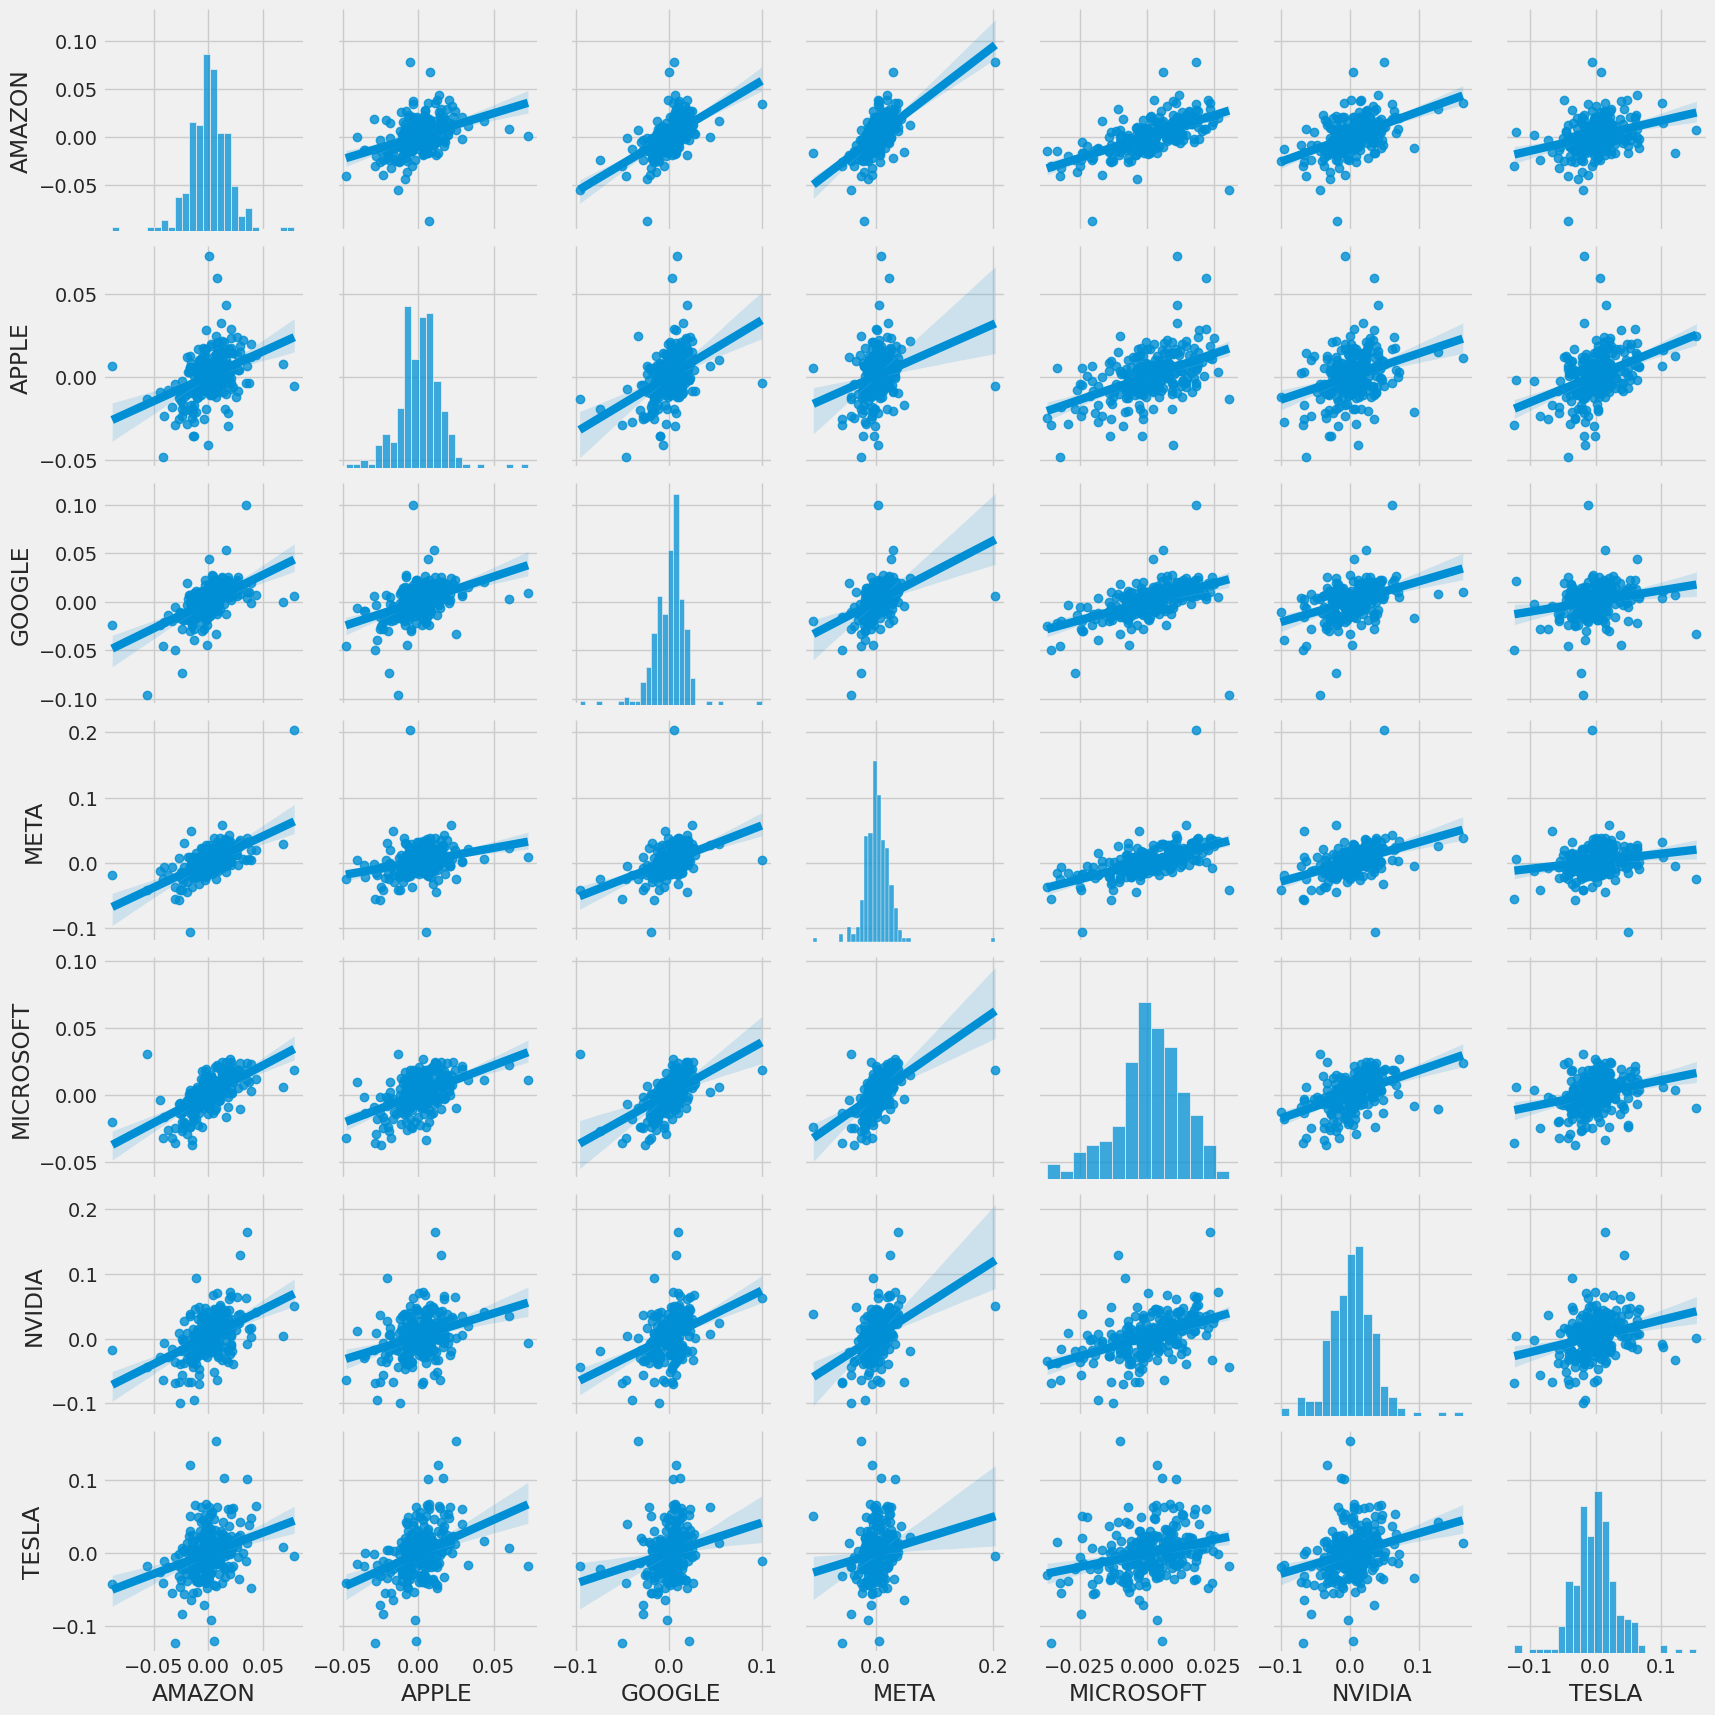

In [122]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')



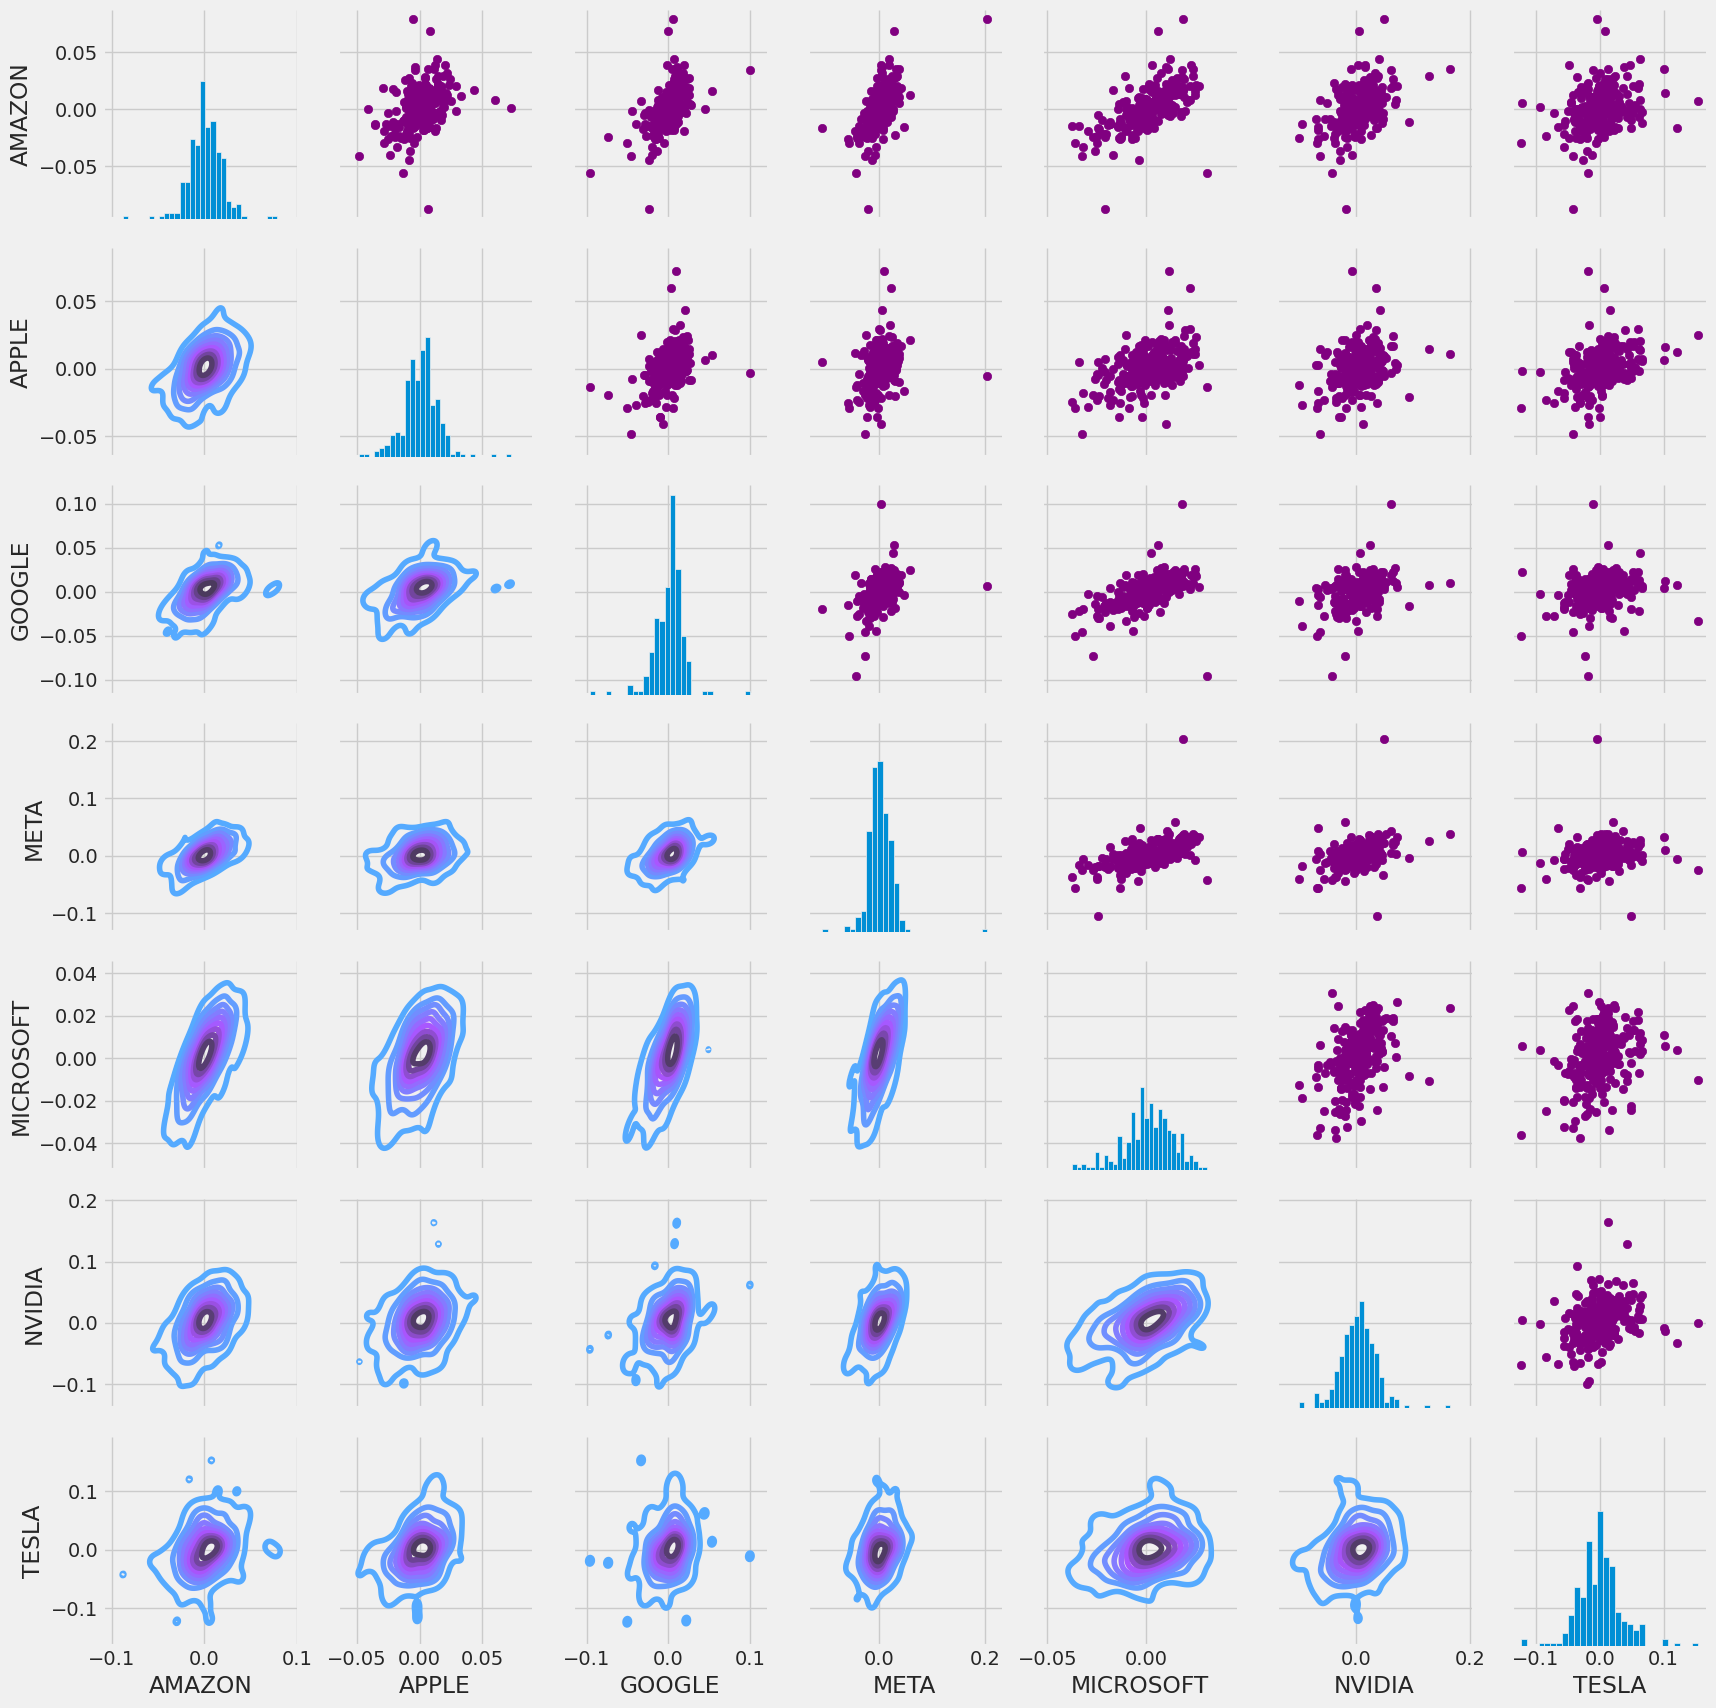

In [123]:


# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)



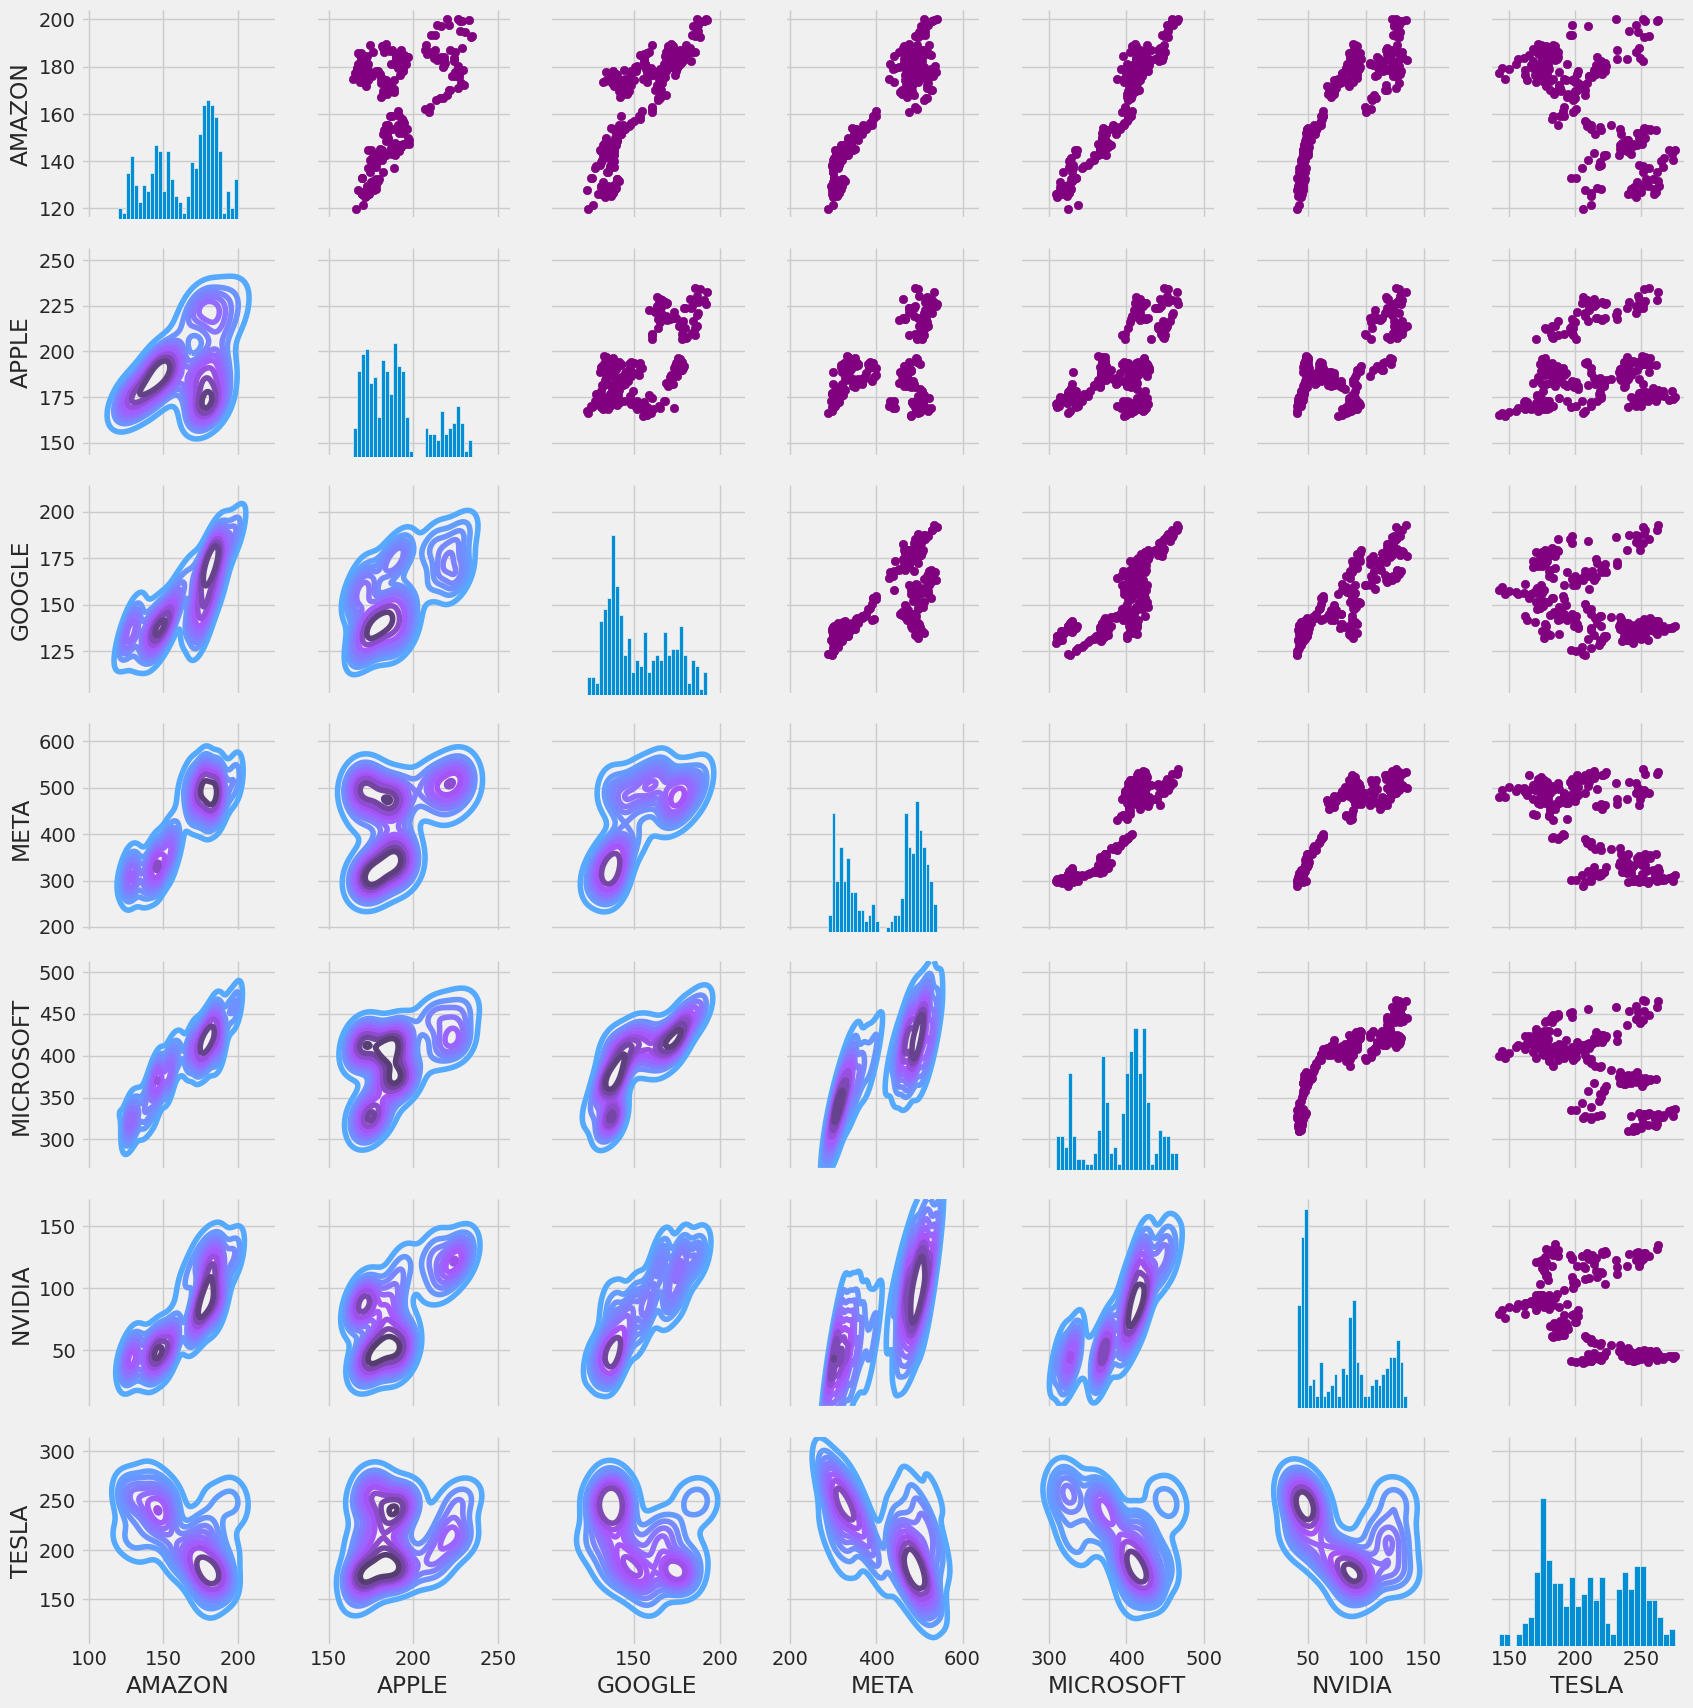

In [126]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df_pivot)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)



Text(0.5, 1.0, 'Correlation of stock closing price')

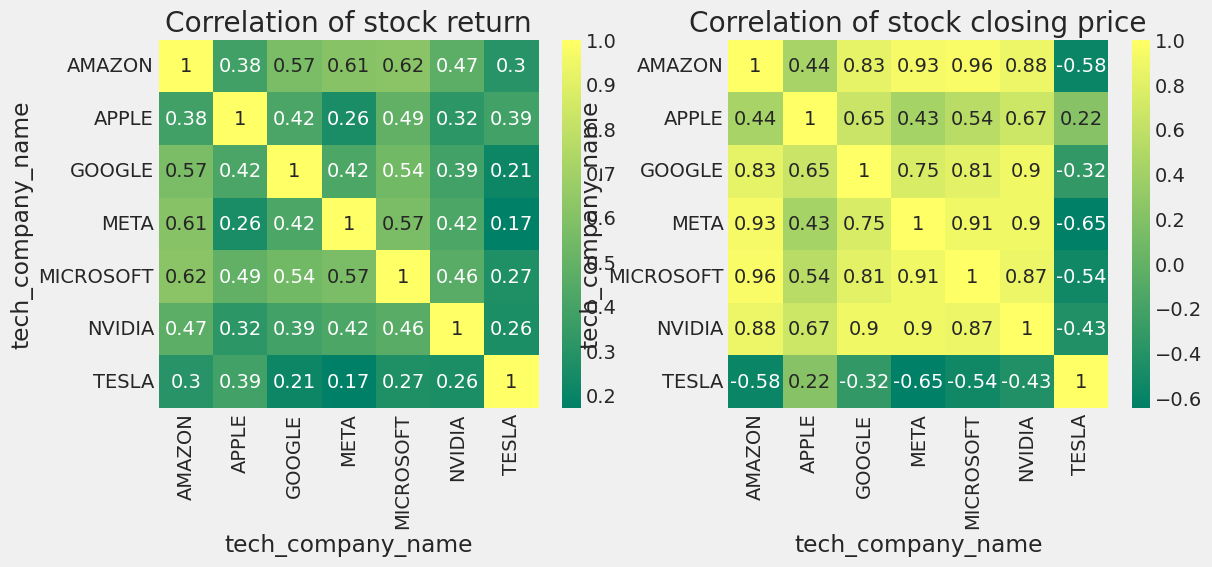

In [128]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df_pivot.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

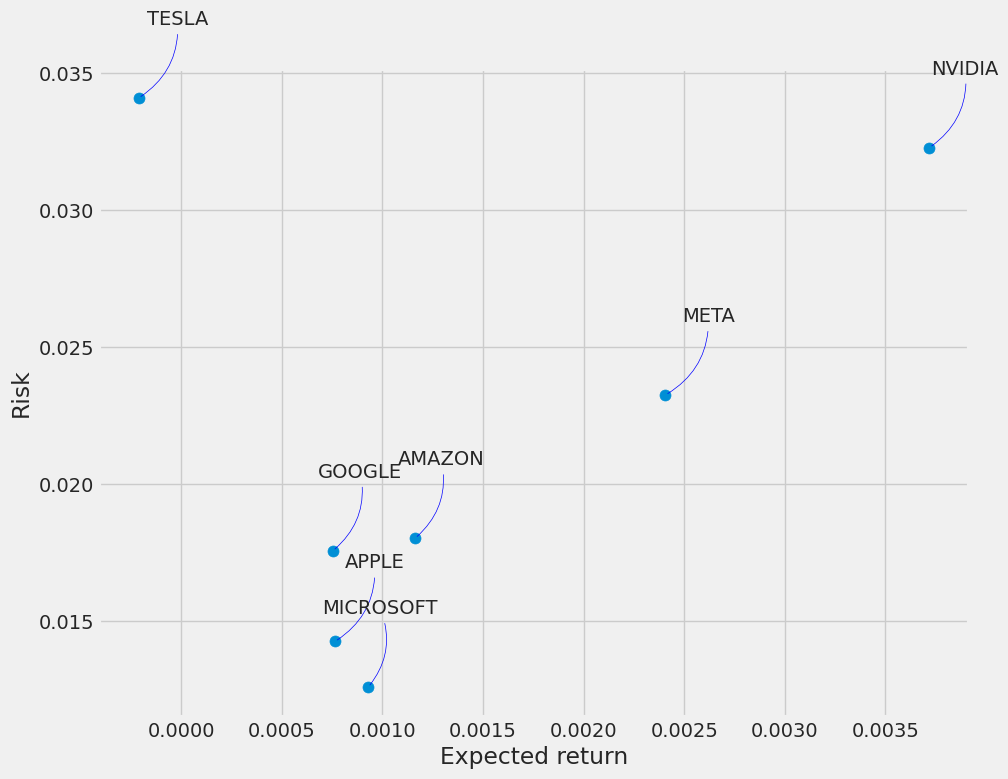

In [129]:

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))



In [135]:
data = yf.download("AAPL", period="1y")
df = pd.DataFrame(data)

df

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-09-05  188.279999  189.979996  187.610001  189.699997  188.734238   
2023-09-06  188.399994  188.850006  181.470001  182.910004  181.978806   
2023-09-07  175.179993  178.210007  173.539993  177.559998  176.656036   
2023-09-08  178.350006  180.240005  177.789993  178.179993  177.272858   
2023-09-11  180.070007  180.300003  177.339996  179.360001  178.446854   
...                ...         ...         ...         ...         ...   
2024-08-27  226.000000  228.850006  224.889999  228.029999  228.029999   
2024-08-28  227.919998  229.860001  225.679993  226.490005  226.490005   
2024-08-29  230.100006  232.919998  228.880005  229.789993  229.789993   
2024-08-30  230.190002  230.399994  227.479996  229.000000  229.000000   
2024-09-03  228.610001  229.000000  221.169998  222.770004  222.770004   

               Volume  
Date                   
2023-09-05   45280000  
2023-09-06   81755800  
2023-09-07  112488800  
2023-09-08   65551300  
2023-09-11   58953100  
...               ...  
2024-08-27   35934600  
2024-08-28   38052200  
2024-08-29   51906300  
2024-08-30   52958500  
2024-09-03   48082190  

[251 rows x 6 columns]

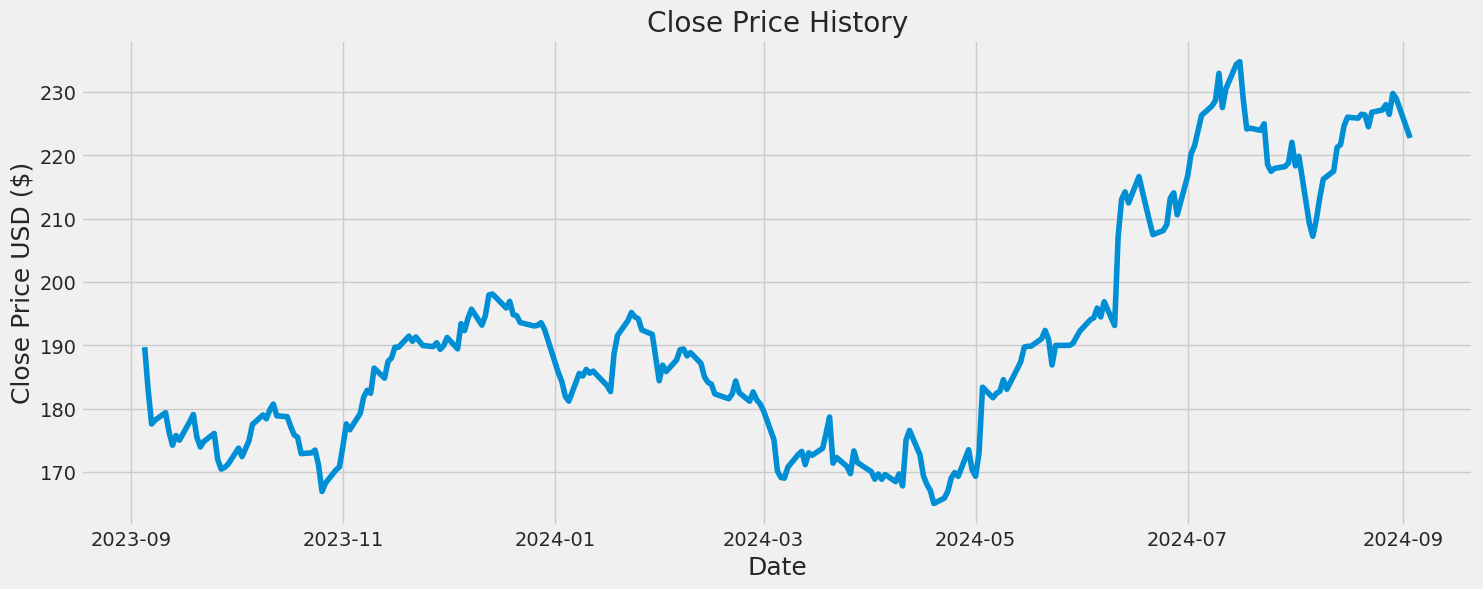

In [137]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()




In [138]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len



239

In [140]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.35376675],
       [0.25651678],
       [0.17989109],
       [0.188771  ],
       [0.20567171],
       [0.16184477],
       [0.13191071],
       [0.15382418],
       [0.14336857],
       [0.18576339],
       [0.20151827],
       [0.15024355],
       [0.1279002 ],
       [0.14021759],
       [0.15869379],
       [0.09968499],
       [0.0777713 ],
       [0.0814953 ],
       [0.08894308],
       [0.12532224],
       [0.10598672],
       [0.12403327],
       [0.14193645],
       [0.17888863],
       [0.20037244],
       [0.19177883],
       [0.21197367],
       [0.22500723],
       [0.1983673 ],
       [0.1965053 ],
       [0.1740188 ],
       [0.1552563 ],
       [0.14981389],
       [0.1128617 ],
       [0.11458034],
       [0.12088229],
       [0.08736759],
       [0.0270696 ],
       [0.0461186 ],
       [0.07576615],
       [0.08264113],
       [0.12847322],
       [0.18003446],
       [0.16685753],
       [0.20380971],
       [0.24090526],
       [0.25623027],
       [0.249

In [141]:


# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape



[array([0.35376675, 0.25651678, 0.17989109, 0.188771  , 0.20567171,
       0.16184477, 0.13191071, 0.15382418, 0.14336857, 0.18576339,
       0.20151827, 0.15024355, 0.1279002 , 0.14021759, 0.15869379,
       0.09968499, 0.0777713 , 0.0814953 , 0.08894308, 0.12532224,
       0.10598672, 0.12403327, 0.14193645, 0.17888863, 0.20037244,
       0.19177883, 0.21197367, 0.22500723, 0.1983673 , 0.1965053 ,
       0.1740188 , 0.1552563 , 0.14981389, 0.1128617 , 0.11458034,
       0.12088229, 0.08736759, 0.0270696 , 0.0461186 , 0.07576615,
       0.08264113, 0.12847322, 0.18003446, 0.16685753, 0.20380971,
       0.24090526, 0.25623027, 0.24935551, 0.30650232, 0.28358638,
       0.32139788, 0.32956162, 0.35391011, 0.3536236 , 0.3788312 ,
       0.36722997, 0.37682605, 0.3576339 , 0.35505572, 0.36379248])]
[np.float64(0.3490402830240633)]

[array([0.35376675, 0.25651678, 0.17989109, 0.188771  , 0.20567171,
       0.16184477, 0.13191071, 0.15382418, 0.14336857, 0.18576339,
       0.20151827, 0.150

In [155]:
import tensorflow as tf
import keras
from tensorflow.python.keras.models import Sequential
#from keras.models import Sequential
from tensorflow.python.keras.layers import Dense, LSTM
#from keras.layers import Dense, LSTM
import setuptools.dist

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)



ModuleNotFoundError: No module named 'distutils'